IMAGE DETECTION USING YOLO V3

In [ ]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
 ! cp kaggle.json ~/.kaggle

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
  ! kaggle datasets list

401 - Unauthorized


In [5]:

 ! kaggle datasets download 'songulerdem/object-detection'

 99% 353M/356M [00:03<00:00, 140MB/s]
100% 356M/356M [00:03<00:00, 116MB/s]


In [6]:
 !unzip object-detection.zip

Archive:  object-detection.zip
  inflating: coco.names              
  inflating: data/computer-g6e4c5589e_1920.jpg  
  inflating: data/home-gc870d5f5b_1920.jpg  
  inflating: data/pexels-pixabay-45170.jpg  
  inflating: data/senior-g8bf177f88_1920.jpg  
  inflating: resnet50_coco_best_v2.1.0.h5  
  inflating: yolov3.cfg              
  inflating: yolov3.weights          


In [7]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install keras-resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20484 sha256=dfc74defd72805c7ec9cb23c2ee5a9cf6c03c62c66cb53c5940c43040d8a1c02
  Stored in directory: /root/.cache/pip/wheels/53/ed/ef/144804f160c278c80d6429c97ed126b61276721894ce64cccc
Successfully built keras-resnet


In [9]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# importing libraries

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Loading datasets

In [13]:
names=open(r"/content/coco.names").read()
print(names)

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [14]:
# Stripping objects

In [15]:
names = names.strip().split("\n")
print(names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [16]:
print(len(names))

80


In [ ]:
# Setting configuration and weight paths

In [23]:
configuration_path = r"/content/yolov3.cfg"
weights_path = r"/content/yolov3.weights"
pro_min = 0.5 
threshold = 0.2

In [ ]:
# Getting and Listing of all layers

In [24]:
net = cv2.dnn.readNetFromDarknet(configuration_path,weights_path)


layers = net.getLayerNames()  

# # printing layers of networks
print(layers)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [25]:
for i in net.getUnconnectedOutLayers():
    #printing output layers
    print(layers[i-1])

yolo_82
yolo_94
yolo_106


In [26]:
output_layers=[layers[i - 1] for i in net.getUnconnectedOutLayers()]

In [27]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
# Uploading an image into the model

In [28]:
image=cv2.imread(r"/content/data/home-gc870d5f5b_1920.jpg")

In [29]:
print(image.shape)

(1280, 1920, 3)


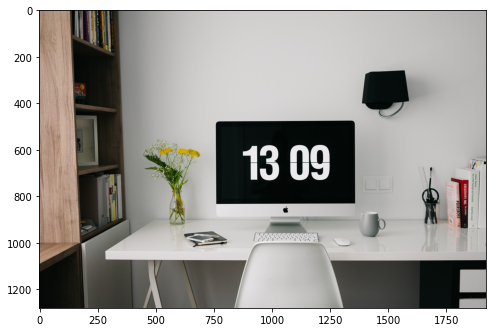

In [30]:
plt.rcParams['figure.figsize'] = (8,8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (400,400), swapRB=True, crop=False)
# This returns a 4 dimensional bolb

print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height

(1280, 1920, 3)
(1, 3, 400, 400)


(400, 400, 3)


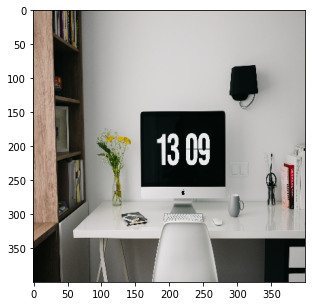

In [32]:
# Slicing blob and transposing 
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

In [33]:
print(blob.shape)

(1, 3, 400, 400)


In [34]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416,416), swapRB=True, crop=False)
# This again returns a 4 dimensional bLob

# printing the shapes
print(image.shape)  
print(blob.shape)  
# Resulted shape has number of images, number of channels, width and height

(1280, 1920, 3)
(1, 3, 416, 416)


(416, 416, 3)


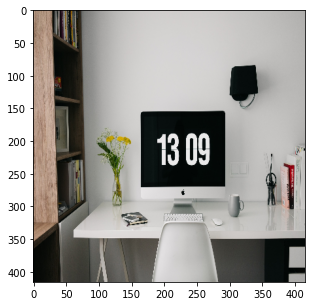

In [35]:
# Again Slicing blob and transposing 
blob_to_show = blob[0, :, :, :].transpose(1, 2,0)
print(blob_to_show.shape) 

plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(blob_to_show)
plt.show()

In [ ]:
# giving blob as input to our YOLO Network.

In [36]:
net.setInput(blob) 
t1=time.time()
output = net.forward(output_layers)
t2 = time.time()

#  Time taken for forward pass
print('YOLO took {:.2f} seconds'.format(t2-t1))

YOLO took 3.76 seconds


In [38]:
colours = np.random.randint(0, 255, size=(len(names), 3),dtype='uint8') 

In [ ]:
# Assigning attributes

In [39]:
classes = []
confidences = []
boxes = []

In [40]:
# Setting height and width

In [42]:
Height = image.shape[0]
Width = image.shape[1]

In [ ]:
# returning indices with max score 

In [43]:
for out in output:
    for res in out:
        scores = res[5:]
        class_current = np.argmax(scores) 

        # Getting the probability for current object
        confidence_current = scores[class_current]

        # Eliminating the weak predictions that is with minimum probability 
        if confidence_current > 0.5:
            
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format just keeps center of detected box and its width and height
            box = res[0:4] * np.array([Width, Height, Width, Height])
            print(res[0:4])
            print(box)

            # From current box with YOLO format getting top left corner coordinates
            # that are x and y
            x, y, w, h = box.astype('int')
            x = int(x - (w / 2))
            y = int(y - (h / 2))
            

            # Adding results into the lists
            boxes.append([x, y, int(w), int(h)]) ## appending all the boxes.
            confidences.append(float(confidence_current)) ## appending all the confidences
            classes.append(class_current) ## appending all the classes 

[0.5508743  0.5261396  0.30463156 0.30586556]
[1057.67864227  673.45870972  584.8925972   391.50791168]
[0.5482358  0.52818483 0.3256229  0.332286  ]
[1052.61268616  676.07658386  625.19594193  425.32608032]
[0.54676884 0.55117553 0.2998812  0.3752817 ]
[1049.79618073  705.50468445  575.77188492  480.36056519]
[0.5614281  0.8795465  0.2580152  0.21919154]
[1077.94200897 1125.81954956  495.38915634  280.56516647]
[0.13841885 0.6356261  0.05844766 0.1678117 ]
[265.7641983  813.60137939 112.21950531 214.79898453]
[0.16542959 0.6279517  0.04115126 0.16252552]
[317.62481689 803.77815247  79.01041746 208.03266525]
[0.30363846 0.6429509  0.05049213 0.14894626]
[582.98583984 822.97714233  96.94489717 190.65120697]
[0.3101188 0.6483527 0.0468784 0.1375158]
[595.42808533 829.89143372  90.00653028 176.02022171]
[0.94106865 0.6393324  0.03941958 0.19066128]
[1806.85180664  818.3454895    75.68558693  244.04644012]
[0.973402   0.6296249  0.03900021 0.22336052]
[1868.93188477  805.9198761    74.8804

In [44]:
results = cv2.dnn.NMSBoxes(boxes, confidences,0.2,0.4)

# Showing labels of the detected objects
for i in range(len(classes)):
    print(names[int(classes[i])])

tvmonitor
tvmonitor
tvmonitor
chair
book
book
vase
vase
book
book
book
book
book
book
book
book
book
vase
vase
cup
cell phone
keyboard
mouse


In [45]:
if len(results) > 0:

    for i in results.flatten():
        
        # Getting current bounding box coordinates
        x, y = boxes[i][0],boxes[i][1]
        width, height = boxes[i][2], boxes[i][3]
        
        colour_box_current = [int(j) for j in colours[classes[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image, (x, y), (x + width, y + height),
                      colour_box_current,7 )

        # Preparing text with label and confidence 
        text_box_current = '{}: {:.4f}'.format(names[int(classes[i])], confidences[i])

        # Putting text with label and confidence
        cv2.putText(image, text_box_current, (x+2, y+2), cv2.FONT_HERSHEY_TRIPLEX, 1.5,(0,0,255))

In [46]:
# Showing the detected image with labels and confidence

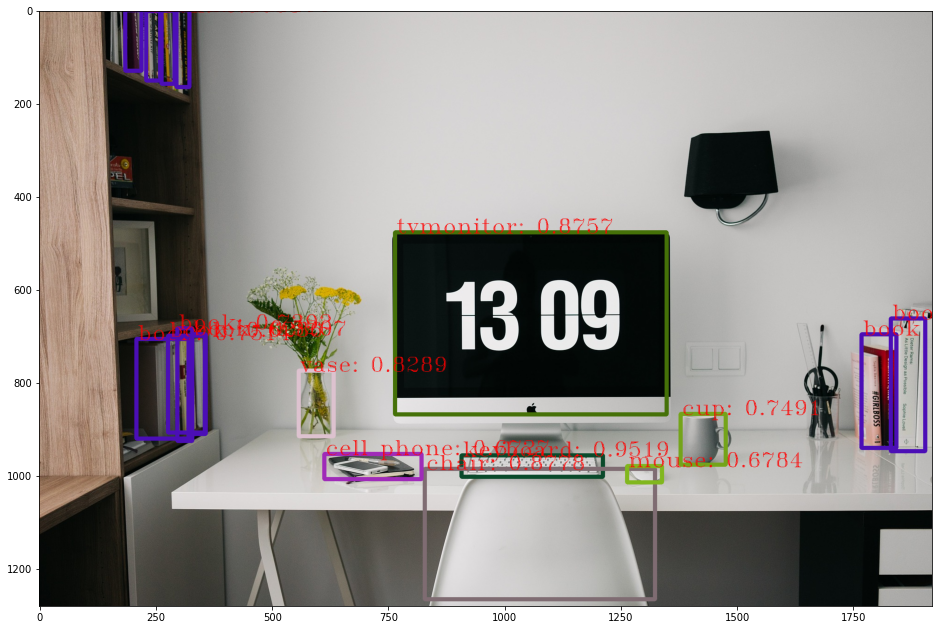

In [47]:
plt.rcParams['figure.figsize'] = (16,20)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()